<a href="https://colab.research.google.com/github/Bhuvanjeet/Credit-Card-Fraud-Detection/blob/master/card_fraud_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

To Identify: - Fraudulent credit card transactions.

Source:- https://www.kaggle.com/mlg-ulb/creditcardfraud

**Project Overview :**

**1- Exploratory Data Analysis - EDA**

**2- Data Visualization**

**3- Outliers Detection**

**4- Inference from Data Visualization**

**5- Data Pre-processing and Decomposition**

**6- Resampling - SMOTEENN**


**7- Machine Learning Algorithms on Resampled data:**


    1- Logistic Regression

    2- K Nearest Neighbors (KNN)

    3- Random Forest Classifier

    4- Naive Bayes Classifier

    5- Deep Neural Network

**8- Results and Comparison**



**Exploratory Data Analysis - EDA**

In [0]:
import pandas as pd
import pandas.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1YyM8W6_oS_gJ0-m35LERdg_lZg_HWK1F'

In [69]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1YyM8W6_oS_gJ0-m35LERdg_lZg_HWK1F


In [0]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('creditcard.csv')

In [0]:
df=pd.read_csv('creditcard.csv')

In [72]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [74]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [75]:
df['Class'].unique()

array([0, 1])

In [76]:
sum(df.duplicated())

1081

In [0]:
df.drop_duplicates(inplace=True)

In [78]:
sum(df.duplicated())

0

In [79]:
df.shape

(283726, 31)

In [80]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


**Data Visualization**

In [81]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

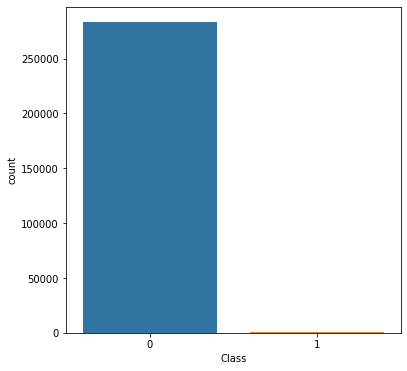

In [82]:
plt.figure(figsize=(6,6)) 
sns.countplot(x='Class',data=df)

In [83]:
# % of normal and fraud transactions
normal_tranc = len(df[df["Class"]==0])
fraud_tranc = len(df[df["Class"]==1])
normal_tranc_percent= normal_tranc/(normal_tranc+fraud_tranc)
print("Percentage of Normal Transacations: ",normal_tranc_percent*100)
fraud_tranc_percent = fraud_tranc/(normal_tranc+fraud_tranc)
print("Percentage of Fraud Transacations: ",fraud_tranc_percent*100)

Percentage of Normal Transacations:  99.83328986416473
Percentage of Fraud Transacations:  0.1667101358352777


We see that the data is highly imbalanced since the number of fraud transactions is very less as compared to correct transactions. So we have to avoid this problem or it may affect our accuracy.

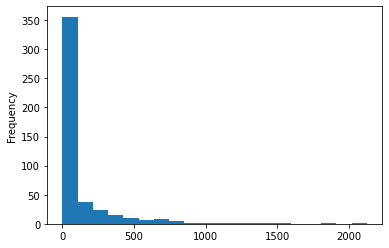

In [84]:
# fraud transaction w.r.t Amount
df[df["Class"]==1]['Amount'].plot.hist(bins=20)

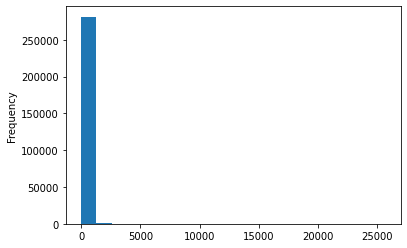

In [85]:
# normal transaction w.r.t Amount
df[df["Class"]==0]['Amount'].plot.hist(bins=20)

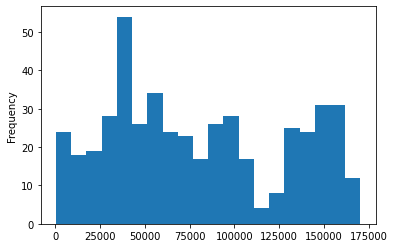

In [86]:
# fraud transaction w.r.t Time
df[df["Class"]==1]['Time'].plot.hist(bins=20)

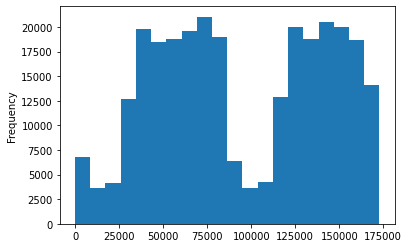

In [87]:
# normal transaction w.r.t Time
df[df["Class"]==0]['Time'].plot.hist(bins=20)

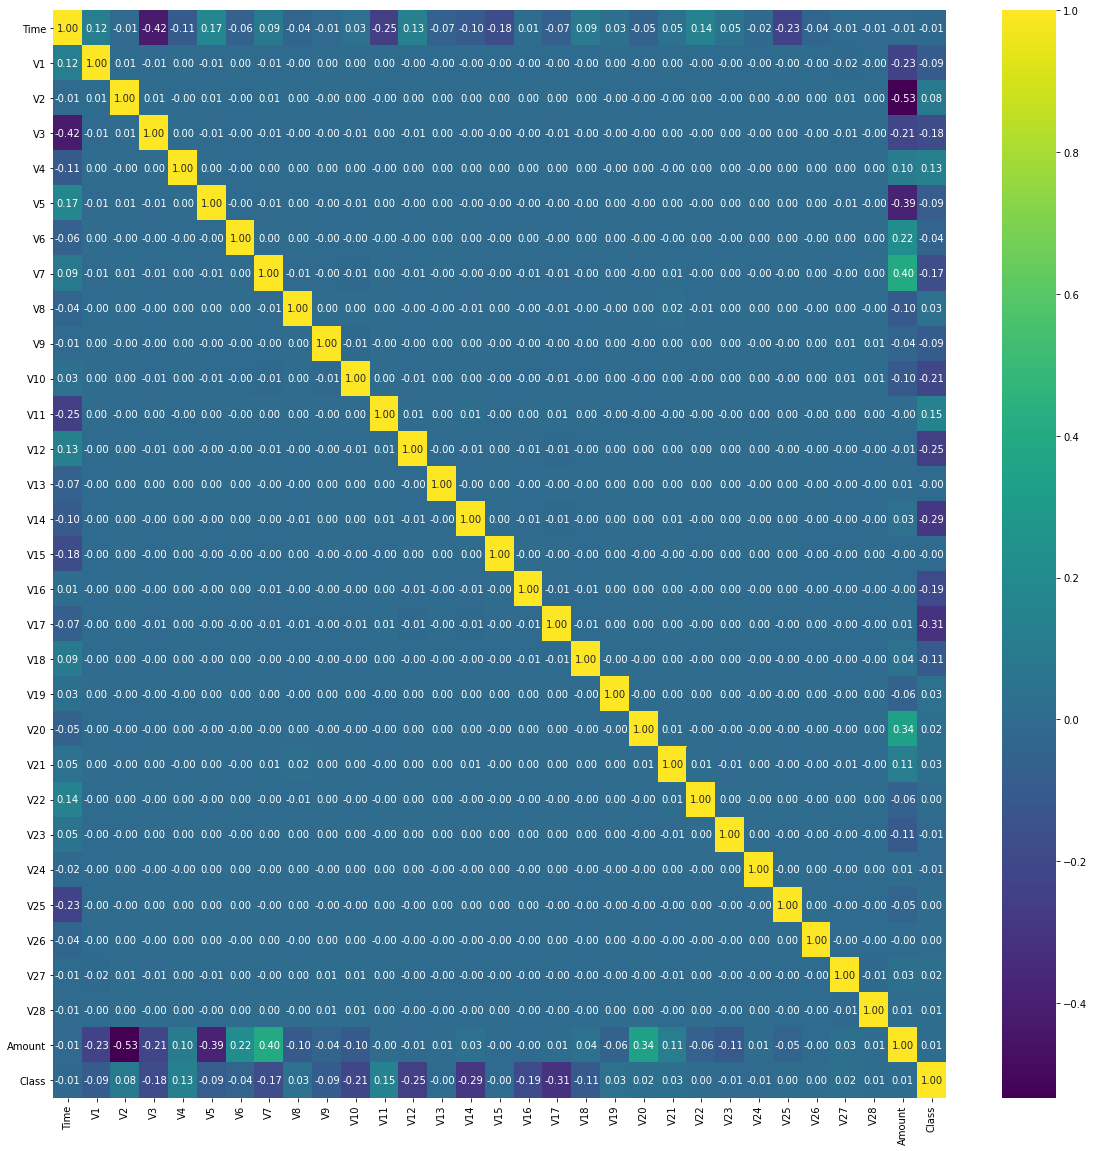

In [88]:
# maps correlation as color encoded matrices.
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt='.2f')

In [89]:
# correlation of 'Class' with other features
df.corr()['Class'].sort_values(ascending=False)
# or 'df.corrwith(df['Class']).sort_values(ascending=False)'

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

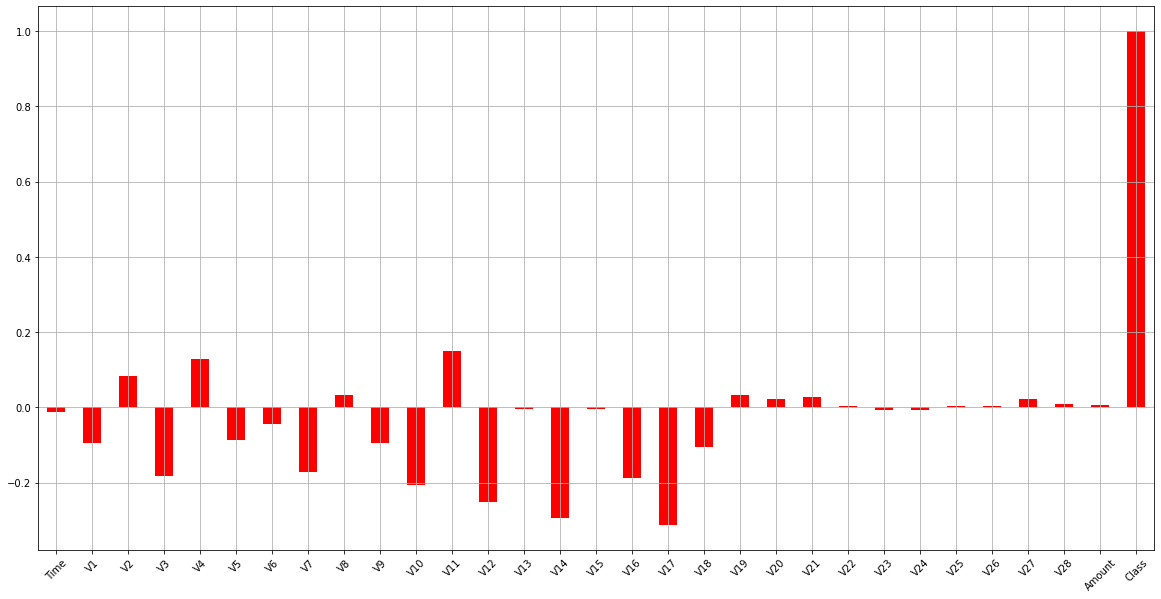

In [90]:
plt.figure(figsize=(20,10))
df.corrwith(df['Class']).plot.bar(color='r',grid=True,rot=45)

We see that most of the features are correlated with 'Class', so we will not 
drop any feature.

**Outliers Detection**

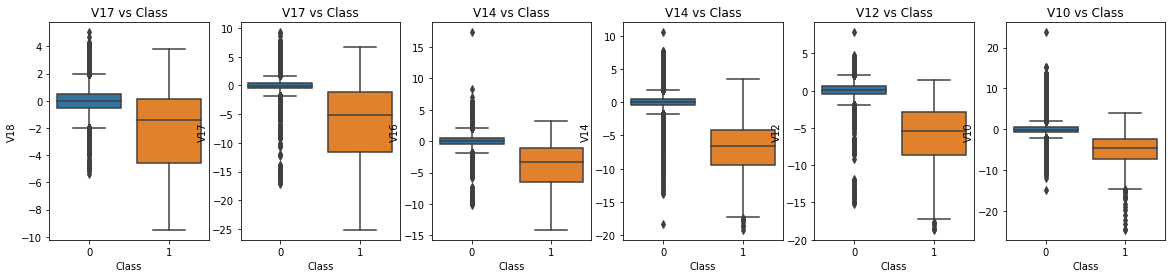

In [91]:
f, axes = plt.subplots(ncols=6, figsize=(20,4))

sns.boxplot(x="Class", y="V18", data=df, ax=axes[0])
axes[0].set_title('V17 vs Class')

sns.boxplot(x="Class", y="V17", data=df, ax=axes[1])
axes[1].set_title('V17 vs Class')

sns.boxplot(x="Class", y="V16", data=df, ax=axes[2])
axes[2].set_title('V14 vs Class')

sns.boxplot(x="Class", y="V14", data=df, ax=axes[3])
axes[3].set_title('V14 vs Class')

sns.boxplot(x="Class", y="V12", data=df, ax=axes[4])
axes[4].set_title('V12 vs Class')

sns.boxplot(x="Class", y="V10", data=df, ax=axes[5])
axes[5].set_title('V10 vs Class')

plt.show()

In the similar way, we can plot boxplots between 'Class' and other features.

**Inferences from Data Visualization**


1-  V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

2-  V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

We see that there are a lot of outliers in the dataset and that we have to remove them or they will affect our result.

Also, till here we have seen that there is no pattern in data as such.

**Data Pre-processing and Decomposition**

Scaling 'Amount' and 'Time' because they both were not scaled, as according to the question.

In [0]:
from sklearn.preprocessing import RobustScaler

In [0]:
rob_scaler=RobustScaler()
# RobustScaler is less prone to outliers.

In [0]:
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1)) # reshape(-1,1) since it is only 1 feature
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

In [0]:
df.drop(['Time','Amount'], axis=1, inplace=True)

In [96]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


Now , to handle imbalanced data, we will do : 

**Resampling** 

1- Resample our data with different size.

2- Use this resampled data to train ML model

3- Use this model to predict for original data

There are various techniques to do so:

1- Undersampling - removing samples from the majority class - TomekLinks , ENN etc.

2- Oversampling - adding more examples from the minority class - SMOTE - Synthetic Minority Over-sampling Technique, ADASYN - Adaptive Synthetic sampling method etc.

We will do: -

**Combined Oversampling and Undersampling - SMOTETomek , SMOTEENN**

We will prefer SMOTEENN since SMOTEENN tends to clear more noisy samples than SMOTETomek and we have seen earlier that our data is too noisy (having many outliers).

In [0]:
X = df.drop('Class', axis=1)
y = df['Class']

In [98]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount',
       'scaled_time'],
      dtype='object')

In [0]:
import imblearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
from imblearn.combine import SMOTEENN
smt=SMOTEENN(ratio=1,random_state=0)
X_smt,y_smt=smt.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [0]:
X_smt.shape

(568146, 30)

In [0]:
y_smt.shape

(568146,)

Let's see the distribution of fraud and normal transactions in resampled data:

In [0]:
X_df= pd.DataFrame(X_smt,columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount',
       'scaled_time'])

In [0]:
y_df= pd.DataFrame(y_smt,columns=['Class'])

In [0]:
y_df.shape

(568146, 1)

In [0]:
X_df= pd.concat([X_df,y_df])

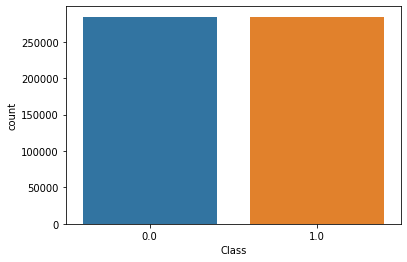

In [0]:
sns.countplot(x='Class',data=X_df)

Now, we see that our data has equal number of fraud and normal transactions and now our data is balanced.

**Using different Machine Learning Algorithms on Resampled data:**

**1- Logistic Regression**

In [0]:
from sklearn.model_selection import train_test_split
X_trainsm, X_testsm, y_trainsm, y_testsm = train_test_split(X_smt, y_smt, test_size=0.3, random_state=42)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_params = {'C': np.logspace(0, 4, 10) , 'penalty':['l1', 'l2']}
grid_log=GridSearchCV(LogisticRegression(), param_grid=log_params,cv=5,verbose=1,refit=True,n_jobs=-1)
#for insights (documentation) in each and every step of GridSearchCV, you can give verbose=1 or any integer. 

In [0]:
grid_log.fit(X_trainsm, y_trainsm)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             s

In [0]:
grid_log.best_estimator_

LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
grid_log.best_params_

{'C': 7.742636826811269, 'penalty': 'l2'}

In [0]:
pred_log=grid_log.predict(X_testsm)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_testsm,pred_log))
print('\nClassification Report:\n',classification_report(y_testsm,pred_log,digits=6))

Confusion Matrix:
 [[83036  2142]
 [ 6572 78694]]

Classification Report:
               precision    recall  f1-score   support

           0   0.926658  0.974853  0.950145     85178
           1   0.973502  0.922924  0.947538     85266

    accuracy                       0.948875    170444
   macro avg   0.950080  0.948888  0.948842    170444
weighted avg   0.950092  0.948875  0.948841    170444



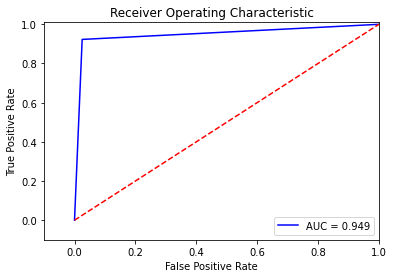

0.9488881091772261

In [0]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_testsm, pred_log)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

**2- K Nearest Neighbors**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn=KNeighborsClassifier(n_neighbors=1)

In [0]:
knn.fit(X_trainsm,y_trainsm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
pred_knn=knn.predict(X_testsm)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_testsm,pred_knn))
print('\nClassification Report:\n',classification_report(y_testsm,pred_knn,digits=6))

Confusion Matrix:
 [[85172     6]
 [    0 85266]]

Classification Report:
               precision    recall  f1-score   support

           0   1.000000  0.999930  0.999965     85178
           1   0.999930  1.000000  0.999965     85266

    accuracy                       0.999965    170444
   macro avg   0.999965  0.999965  0.999965    170444
weighted avg   0.999965  0.999965  0.999965    170444



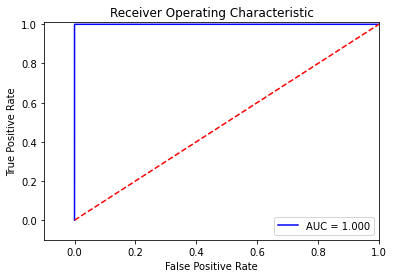

0.9999647796379346

In [0]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_testsm, pred_knn)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

**3- Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(random_state = 0, n_estimators = 250,criterion = 'entropy')
rfc.fit(X_trainsm, y_trainsm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
pred_rfc=rfc.predict(X_testsm)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_testsm,pred_rfc))
print('\nClassification Report:\n',classification_report(y_testsm,pred_rfc,digits=6))

Confusion Matrix:
 [[85172     6]
 [    0 85266]]

Classification Report:
               precision    recall  f1-score   support

           0   1.000000  0.999930  0.999965     85178
           1   0.999930  1.000000  0.999965     85266

    accuracy                       0.999965    170444
   macro avg   0.999965  0.999965  0.999965    170444
weighted avg   0.999965  0.999965  0.999965    170444



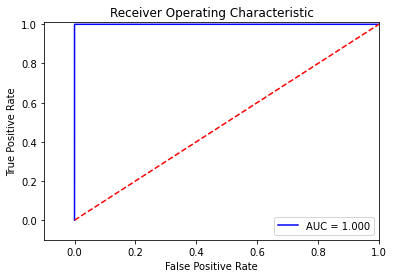

0.9999647796379346

In [0]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_testsm, pred_rfc)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

**4- Naive Bayes Classifier**

In [0]:
from sklearn.naive_bayes import GaussianNB   
#Naive Bayes classifier assumes that the presence of a particular feature 
#in a class is unrelated to the presence of any other feature.
nb=GaussianNB()   # using GaussianNB instead of MultinomialNB since there are negative values also in the dataset
nb.fit(X_trainsm,y_trainsm)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
pred_nb=nb.predict(X_testsm)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_testsm,pred_nb))
print('\nClassification Report:\n',classification_report(y_testsm,pred_nb,digits=6))

Confusion Matrix:
 [[83045  2133]
 [12471 72795]]

Classification Report:
               precision    recall  f1-score   support

           0   0.869435  0.974958  0.919178     85178
           1   0.971533  0.853740  0.908836     85266

    accuracy                       0.914318    170444
   macro avg   0.920484  0.914349  0.914007    170444
weighted avg   0.920510  0.914318  0.914004    170444



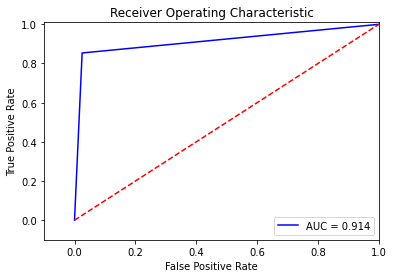

0.9143491915440286

In [0]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_testsm, pred_nb)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

**5- Deep Neural Network**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model=Sequential()
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(22,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy')

In [0]:
#keras will automatically stop training the model based on a loss condition on 
#the validation data passed during the model.fit() call.
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
#patience indicates the number of epochs to be done more after keras does early 
#stopping. This is done to ensure that the model is not affected 
#by some noise in the data.

In [0]:
model.fit(X_trainsm,y_trainsm,epochs=20,validation_data=(X_testsm,y_testsm),verbose=1,callbacks=[early_stop])

Epoch 1/20
12429/12429 [==============================] - 19s 2ms/step - loss: 0.0899 - val_loss: 0.0312
Epoch 2/20
12429/12429 [==============================] - 19s 2ms/step - loss: 0.0186 - val_loss: 0.0127
Epoch 3/20
12429/12429 [==============================] - 19s 2ms/step - loss: 0.0127 - val_loss: 0.0132
Epoch 4/20
12429/12429 [==============================] - 19s 2ms/step - loss: 0.0123 - val_loss: 0.0102
Epoch 5/20
12429/12429 [==============================] - 19s 2ms/step - loss: 0.0112 - val_loss: 0.0151
Epoch 6/20
12429/12429 [==============================] - 19s 2ms/step - loss: 0.0114 - val_loss: 0.0107
Epoch 7/20
12429/12429 [==============================] - 19s 2ms/step - loss: 0.0107 - val_loss: 0.0088
Epoch 8/20
12429/12429 [==============================] - 20s 2ms/step - loss: 0.0105 - val_loss: 0.0100
Epoch 9/20
12429/12429 [==============================] - 19s 2ms/step - loss: 0.0105 - val_loss: 0.0103
Epoch 10/20
12429/12429 [==============================

In [0]:
model.history.history

{'loss': [0.08994434773921967,
  0.018609557300806046,
  0.012653855606913567,
  0.012307017110288143,
  0.011201707646250725,
  0.01140627358108759,
  0.010676571168005466,
  0.010525144636631012,
  0.010516799986362457,
  0.010196481831371784],
 'val_loss': [0.03124861605465412,
  0.012651393190026283,
  0.013247642666101456,
  0.010174158029258251,
  0.01506841741502285,
  0.010702361352741718,
  0.0088042002171278,
  0.010016386397182941,
  0.010335761122405529,
  0.008821423165500164]}

In [0]:
loss_df=pd.DataFrame(model.history.history)

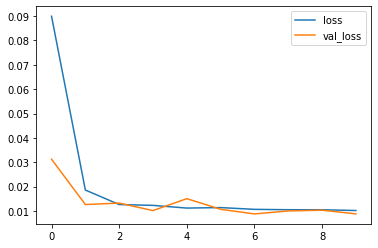

In [0]:
loss_df.plot()

In [0]:
pred_neural=model.predict(X_testsm)

In [0]:
from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_testsm,pred_neural))
print('Mean Squared Error:',metrics.mean_squared_error(y_testsm,pred_neural))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_testsm,pred_neural)))

Mean Absolute Error: 0.004222009378266442
Mean Squared Error: 0.0019435099816502053
Root Mean Squared Error: 0.04408525809894057


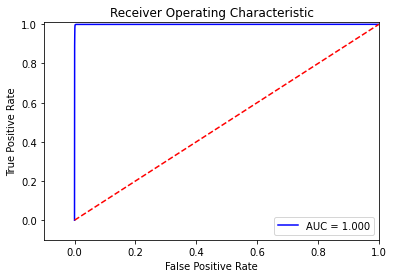

0.9998446205367267

In [0]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_testsm, pred_neural)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

**Results and Comparison**

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
print('Results of Logistic Regression:\n')
print('Confusion Matrix:\n',confusion_matrix(y_testsm,pred_log))
print('\nClassification Report:\n',classification_report(y_testsm,pred_log,digits=6))

from sklearn.metrics import confusion_matrix,classification_report
print('Results of K Nearest Neighbors Classifier:\n')
print('Confusion Matrix:\n',confusion_matrix(y_testsm,pred_knn))
print('\nClassification Report:\n',classification_report(y_testsm,pred_knn,digits=6))

from sklearn.metrics import confusion_matrix,classification_report
print('Results of Random Forest Classifier:\n')
print('Confusion Matrix:\n',confusion_matrix(y_testsm,pred_rfc))
print('\nClassification Report:\n',classification_report(y_testsm,pred_rfc,digits=6))

from sklearn.metrics import confusion_matrix,classification_report
print('Results of Naive Bayes Classifier:\n')
print('Confusion Matrix:\n',confusion_matrix(y_testsm,pred_nb))
print('\nClassification Report:\n',classification_report(y_testsm,pred_nb,digits=6))

from sklearn import metrics 
print('Results of Deep Neural Network:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_testsm,pred_neural))
print('Mean Squared Error:',metrics.mean_squared_error(y_testsm,pred_neural))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_testsm,pred_neural)))

Results of Logistic Regression:

Confusion Matrix:
 [[83036  2142]
 [ 6572 78694]]

Classification Report:
               precision    recall  f1-score   support

           0   0.926658  0.974853  0.950145     85178
           1   0.973502  0.922924  0.947538     85266

    accuracy                       0.948875    170444
   macro avg   0.950080  0.948888  0.948842    170444
weighted avg   0.950092  0.948875  0.948841    170444

Results of K Nearest Neighbors Classifier:

Confusion Matrix:
 [[85172     6]
 [    0 85266]]

Classification Report:
               precision    recall  f1-score   support

           0   1.000000  0.999930  0.999965     85178
           1   0.999930  1.000000  0.999965     85266

    accuracy                       0.999965    170444
   macro avg   0.999965  0.999965  0.999965    170444
weighted avg   0.999965  0.999965  0.999965    170444

Results of Random Forest Classifier:

Confusion Matrix:
 [[85172     6]
 [    0 85266]]

Classification Report:
       